# Addestramento 1

In [3]:
import tensorflow as tf
from keras.legacy_tf_layers.convolutional import Conv1D
from tensorflow import keras
import pandas as pd
!pip install d2l==1.0.0a1.post0
from d2l import tensorflow as d2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
model = keras.models.Sequential([
keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="valid", input_shape=[300, 1]),
keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="valid"),
keras.layers.MaxPooling1D(pool_size=2, strides=2),
keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="valid"),
keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="valid"),
keras.layers.MaxPooling1D(pool_size=2, strides=2),
keras.layers.Flatten(),
keras.layers.Dense(256, activation=tf.nn.relu),
keras.layers.Dense(128, activation=tf.nn.relu),
keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 296, 64)           384       
                                                                 
 conv1d_1 (Conv1D)           (None, 292, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 146, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 144, 128)          24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 142, 128)          49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 71, 128)          0         
 1D)                                                    

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

test_error_rate = model.evaluate(x_test, y_test, verbose=0)

NameError: name 'x_train' is not defined

# Addestramento 2

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model



input_tot = Input(shape=(251, 1), name ="Input_tot")

# Pipeline 1
branch1_1 = keras.layers.Conv1D(filters=8, kernel_size=4, activation='relu', name ="branch1_1")(input_tot)
branch1_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch1_2")(branch1_1)
branch1_3 = keras.layers.Conv1D(filters=24, kernel_size=6, activation='relu', name ="branch1_3")(branch1_2)
branch1_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch1_4")(branch1_3)

# Pipeline 2
branch2_1 = keras.layers.Conv1D(filters=8, kernel_size=6, activation='relu', name ="branch2_1")(input_tot)
branch2_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch2_2")(branch2_1)
branch2_3 = keras.layers.Conv1D(filters=24, kernel_size=8, activation='relu', name ="branch2_3")(branch2_2)
branch2_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch2_4")(branch2_3)

# Pipeline 3
branch3_1 = keras.layers.Conv1D(filters=8, kernel_size=8, activation='relu', name ="branch3_1")(input_tot)
branch3_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch3_2")(branch3_1)
branch3_3 = keras.layers.Conv1D(filters=24, kernel_size=10, activation='relu', name ="branch3_3")(branch3_2)
branch3_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch3_4")(branch3_3)

#Merging tre pipeline
branch_concatenate = concatenate([branch1_4,branch2_4,branch3_4], axis=1, name="concatenated_layer")

#Final Layer
dense1 = Dense(256, activation = "sigmoid", name = "dense1")(branch_concatenate)
dense2 = Dense(32, activation = "sigmoid", name = "dense2")(dense1)
output_layer = Dense(4, activation = "sigmoid", name = "output_layer")(dense2)

#Model Definition
merged = Model(inputs=[input_tot],outputs=[output_layer], name = "merged model")

#Model Details
merged.summary()
keras.utils.plot_model(merged, "output/architecture.png", show_shapes=True)

C:\Users\andre\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Model: "merged model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_tot (InputLayer)         [(None, 251, 1)]     0           []                               
                                                                                                  
 branch1_1 (Conv1D)             (None, 248, 8)       40          ['Input_tot[0][0]']              
                                                                                                  
 branch2_1 (Conv1D)             (None, 246, 8)       56          ['Input_tot[0][0]']              
                                                                                                  
 branch3_1 (Conv1D)             (None, 244, 8)       72          ['Input_tot[0][0]']              
                                                                                       

In [8]:
df = pd.read_csv('heartbeats/heartbeats_datasets.csv')

df.head(1)

,signal,annotypes
0,[-0.265 -0.27 -0.265 -0.26 -0.275 -0.28 -0....,N


# Addestramento 3

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [48]:
input = (251, 1)
model = create_lstm_model(input, 2)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 251, 128)          66560     
                                                                 
 dropout_4 (Dropout)         (None, 251, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 198,402
Trainable params: 198,402
Non-trainable params: 0
_________________________________________________________________


# Addestramento 4

In [59]:
from keras.layers import Input, Conv1D, BatchNormalization, Activation, MaxPooling1D, LSTM, GlobalAveragePooling1D, Dense, Reshape
from keras.models import Model

def create_model(input_shape, n_classes):
    inputs = Input(shape=input_shape)

    x = Conv1D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)

    x = Conv1D(128, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)

    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    print(x)



    x = LSTM(128, return_sequences=True, go_backwards=False, dropout=0.5)(x)
    x = LSTM(128, return_sequences=False, go_backwards=True, dropout=0.5)(x)

    x = Reshape((-1, 128))(x)

    x = GlobalAveragePooling1D()(x)

    outputs = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model


In [60]:
input = (251, 1)
model = create_model(input, 2)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 126, 128), dtype=tf.float32, name=None), name='max_pooling1d_5/Squeeze:0', description="created by layer 'max_pooling1d_5'")
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 251, 1)]          0         
                                                                 
 conv1d_19 (Conv1D)          (None, 251, 32)           128       
                                                                 
 batch_normalization_15 (Bat  (None, 251, 32)          128       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 251, 32)           0         
                                                                 
 conv1d_20 (Conv1D)          (None, 251, 64)           6208      
                    

In [3]:
!pip install torch

In [23]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

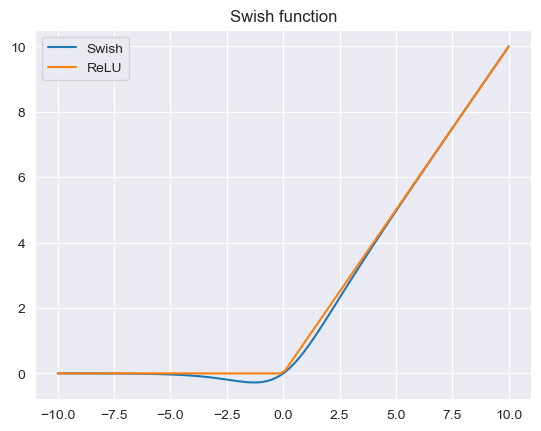

In [24]:
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

x = torch.linspace(-10.0, 10.0, 100)
swish = Swish()
swish_out = swish(x)
relu_out = torch.relu(x)

plt.title('Swish function')
plt.plot(x.numpy(), swish_out.numpy(), label='Swish')
plt.plot(x.numpy(), relu_out.numpy(), label='ReLU')
plt.legend()
plt.show()

In [25]:
class ConvNormPool(nn.Module):
    """Conv Skip-connection module"""
    def __init__(self, input_size, hidden_size, kernel_size, norm_type='bachnorm'):
        super().__init__()

        self.kernel_size = kernel_size
        self.conv_1 = nn.Conv1d(in_channels=input_size, out_channels=hidden_size, kernel_size=kernel_size)
        self.conv_2 = nn.Conv1d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=kernel_size)
        self.conv_3 = nn.Conv1d(in_channels=hidden_size, out_channels=hidden_size, kernel_size=kernel_size)
        self.swish_1 = Swish()
        self.swish_2 = Swish()
        self.swish_3 = Swish()
        if norm_type == 'group':
            self.normalization_1 = nn.GroupNorm(num_groups=8, num_channels=hidden_size)
            self.normalization_2 = nn.GroupNorm(num_groups=8, num_channels=hidden_size)
            self.normalization_3 = nn.GroupNorm(num_groups=8, num_channels=hidden_size)
        else:
            self.normalization_1 = nn.BatchNorm1d(num_features=hidden_size)
            self.normalization_2 = nn.BatchNorm1d(num_features=hidden_size)
            self.normalization_3 = nn.BatchNorm1d(num_features=hidden_size)

        self.pool = nn.MaxPool1d(kernel_size=2)

    def forward(self, input):
        conv1 = self.conv_1(input)
        x = self.normalization_1(conv1)
        x = self.swish_1(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        conv2 = self.conv_2(x)
        x = self.normalization_2(conv2)
        x = self.swish_2(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        conv3 = self.conv_3(x)
        x = self.normalization_3(conv1+conv3)
        x = self.swish_3(x)
        x = F.pad(x, pad=(self.kernel_size - 1, 0))

        x = self.pool(x)
        return x

In [26]:
class RNN(nn.Module):
    """RNN module(cell type lstm or gru)"""
    def __init__(self, input_size, hid_size, num_rnn_layers=1, dropout_p = 0.2, bidirectional = False, rnn_type = 'lstm'):
        super().__init__()
        if rnn_type == 'lstm':
            self.rnn_layer = nn.LSTM( input_size=input_size, hidden_size=hid_size, num_layers=num_rnn_layers, dropout=dropout_p if num_rnn_layers>1 else 0, bidirectional=bidirectional, batch_first=True)
        else:
            self.rnn_layer = nn.GRU(input_size=input_size, hidden_size=hid_size, num_layers=num_rnn_layers, dropout=dropout_p if num_rnn_layers>1 else 0, bidirectional=bidirectional, batch_first=True)

    def forward(self, input):
        outputs, hidden_states = self.rnn_layer(input)
        return outputs, hidden_states

In [27]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hid_size, rnn_type, bidirectional, n_classes=5, kernel_size=5):
        super().__init__()
        self.rnn_layer = RNN(
            input_size=46,#hid_size * 2 if bidirectional else hid_size,
            hid_size=hid_size,
            rnn_type=rnn_type,
            bidirectional=bidirectional
        )
        self.conv1 = ConvNormPool(input_size=input_size, hidden_size=hid_size, kernel_size=kernel_size)
        self.conv2 = ConvNormPool(input_size=hid_size, hidden_size=hid_size, kernel_size=kernel_size)
        self.avgpool = nn.AdaptiveAvgPool1d((1))
        self.fc = nn.Linear(in_features=hid_size, out_features=n_classes)

    def forward(self, input):
        x = self.conv1(input)
        x = self.conv2(x)
        x, _ = self.rnn_layer(x)
        x = self.avgpool(x)
        x = x.view(-1, x.size(1) * x.size(2))
        x = F.softmax(self.fc(x), dim=1)#.squeeze(1)
        return x

In [29]:
model = RNNModel(1, 64, 'lstm', True)
print('Model: ')
print(model)

Model: 
RNNModel(
  (rnn_layer): RNN(
    (rnn_layer): LSTM(46, 64, batch_first=True, bidirectional=True)
  )
  (conv1): ConvNormPool(
    (conv_1): Conv1d(1, 64, kernel_size=(5,), stride=(1,))
    (conv_2): Conv1d(64, 64, kernel_size=(5,), stride=(1,))
    (conv_3): Conv1d(64, 64, kernel_size=(5,), stride=(1,))
    (swish_1): Swish()
    (swish_2): Swish()
    (swish_3): Swish()
    (normalization_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (normalization_2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (normalization_3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): ConvNormPool(
    (conv_1): Conv1d(64, 64, kernel_size=(5,), stride=(1,))
    (conv_2): Conv1d(64, 64, kernel_size=(5,), stride=(1,))
    (conv_3): Conv1d(64, 64, kernel_size=(5,), stride=(1,))
    (swish_1

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Add
import tensorflow as tf

class ConvNormPool(tf.keras.Model):
    """Conv Skip-connection module"""
    def __init__(self, input_size, hidden_size, kernel_size, norm_type='batchnorm'):
        super(ConvNormPool, self).__init__()

        self.kernel_size = kernel_size
        self.conv_1 = Conv1D(filters=hidden_size, kernel_size=kernel_size,
                             input_shape=(None, input_size))
        self.conv_2 = Conv1D(filters=hidden_size, kernel_size=kernel_size)
        self.conv_3 = Conv1D(filters=hidden_size, kernel_size=kernel_size)
        if norm_type == 'group':
            self.normalization_1 = NotImplementedError("Group normalization is not supported in Keras")
            self.normalization_2 = NotImplementedError("Group normalization is not supported in Keras")
            self.normalization_3 = NotImplementedError("Group normalization is not supported in Keras")
        else:
            self.normalization_1 = BatchNormalization()
            self.normalization_2 = BatchNormalization()
            self.normalization_3 = BatchNormalization()

        self.pool = MaxPooling1D(pool_size=2)

    def call(self, input):
        conv1 = self.conv_1(input)
        x = self.normalization_1(conv1)
        x = tf.nn.swish(x)
        x = tf.pad(x, paddings=[[0, 0], [self.kernel_size - 1, 0], [0, 0]])

        conv2 = self.conv_2(x)
        x = self.normalization_2(conv2)
        x = tf.nn.swish(x)
        x = tf.pad(x, paddings=[[0, 0], [self.kernel_size - 1, 0], [0, 0]])

        conv3 = self.conv_3(x)
        x = self.normalization_3(tf.keras.layers.add([conv1, conv3]))
        x = tf.nn.swish(x)
        x = tf.pad(x, paddings=[[0, 0], [self.kernel_size - 1, 0], [0, 0]])

        x = self.pool(x)
        return x


In [ ]:


# class RNN:
#     def __init__(self, input_size, hid_size, num_rnn_layers=1, dropout_p=0.2, bidirectional=False, rnn_type='lstm'):
#         self.model = Sequential()
#         if rnn_type == 'lstm':
#             self.model.add(LSTM(hid_size, input_shape=(None, input_size),
#                                  return_sequences=True, dropout=dropout_p if num_rnn_layers > 1 else 0,
#                                  bidirectional=bidirectional))
#         else:
#             self.model.add(GRU(hid_size, input_shape=(None, input_size),
#                                 return_sequences=True, dropout=dropout_p if num_rnn_layers > 1 else 0,
#                                 bidirectional=bidirectional))
#
#     def __call__(self, x):
#         return self.model(x)


In [38]:
from tensorflow import keras
import numpy as np
from keras.layers import LSTM, GRU
from keras.models import Sequential

class RNNModel(keras.Model):
    def __init__(self, input_size, hid_size, rnn_type, n_classes=5, kernel_size=5):
        super().__init__()
        if rnn_type == 'lstm':
            self.rnn_layer = keras.layers.LSTM(hid_size, return_sequences=True)(input_size)
        else:
            self.rnn_layer = keras.layers.GRU(hid_size, return_sequences=True)(input_size)
        self.conv1 = keras.layers.Conv1D(hid_size, kernel_size, padding='same', activation='relu')
        self.conv2 = keras.layers.Conv1D(hid_size, kernel_size, padding='same', activation='relu')
        self.avgpool = keras.layers.GlobalAveragePooling1D()
        self.fc = keras.layers.Dense(n_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.rnn_layer(x)
        x = self.avgpool(x)
        x = self.fc(x)
        return x


In [39]:
model = RNNModel(1, 64, 'lstm')
model.summary()

ValueError: Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=0. Full shape received: ()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 251, 128)          66560     
                                                                 
 dropout_2 (Dropout)         (None, 251, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 198,402
Trainable params: 198,402
Non-trainable params: 0
_________________________________________________________________
